<a href="https://colab.research.google.com/github/Souza172890/Teste_Tecnico/blob/main/Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#instalando as bibliotecas necessárias
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 0s (127 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Reading package lists... Done
Building dependency tree       
Reading state 

In [2]:
#instalando as bibliotecas necessárias
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely
!pip install shapely --no-binary shapely
!pip install pyproj

Selecting previously unselected package python-pkg-resources.
(Reading database ... 155238 files and directories currently installed.)
Preparing to unpack .../00-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-pyshp.
Preparing to unpack .../01-python-pyshp_1.2.12+ds-1_all.deb ...
Unpacking python-pyshp (1.2.12+ds-1) ...
Selecting previously unselected package python-shapely.
Preparing to unpack .../02-python-shapely_1.6.4-1_amd64.deb ...
Unpacking python-shapely (1.6.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../03-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-cartopy:amd64.
Preparing to unpack .../04-python-cartopy_0.14.2+dfsg1-2build3_amd64.deb ...
Unpacking python-cartopy:amd64 (0.14.2+dfsg1-2build3) ...
Selecting previously unselected package python3-numpy.
Preparing to unpack .../05-python

In [3]:
#instalando as bibliotecas necessárias
!pip install salem

     |████████████████████████████████| 85 kB 4.4 MB/s 


In [4]:
#instalando as bibliotecas necessárias
!pip install geopandas

     |████████████████████████████████| 1.0 MB 27.9 MB/s 
     |████████████████████████████████| 15.4 MB 57.5 MB/s 


In [57]:
#para conversão do arquivo usei cdo no linux, usando o seguinte comando: cdo -f nc copy MERGE_CPTEC_20210901.grb2 MERGE_CPTEC_20210901.nc
#feito a conversão, carrei o arquivo no colab e comecei a manipulação
#importando as bibliotecas necessárias
import salem
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs                         
import cartopy.io.shapereader as shpreader                           
import xarray as xr
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER

In [6]:
#lendo os arquivos shapefile BR_UF_2019.shp(contendo todos os estados do Brasil) e tiete.shp()
def plot_SP():
    shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=1.0)
def plot_BC():
    shapefile = list(shpreader.Reader('tiete.shp').geometries())
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='skyblue', linewidth=1.0)

/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


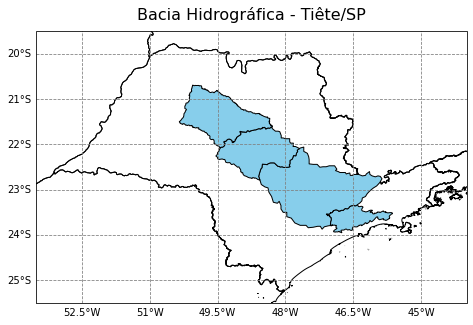

In [7]:
#visualização da bacia hidrográfica do rio tiête localizado na cidade de São Paulo
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-53.5, -44, -25.5, -19.5])
g1 = ax.gridlines(crs=ccrs.PlateCarree(), linestyle='--', color='gray', draw_labels=True)
ax.set_title('Bacia Hidrográfica - Tiête/SP', fontsize=16, y=1.02)
g1.xlabels_top = False
g1.ylabels_right = False
plot_SP()
plot_BC()


In [35]:
#Abrindo o arquivo Netcdf como um dataset e convertendo as longitudes para variarem de -180 a 180° ao invés de 0 a 360°:
ds = salem.open_xr_dataset('MERGE_CPTEC_20210901.nc')
ds.coords['longitude'] = ((ds.coords['longitude'] + 180) % 360) - 180
ds = ds.sortby(ds.longitude)
ds

<xarray.Dataset>
Dimensions:        (latitude: 924, longitude: 1001, time: 1)
Coordinates:
  * latitude       (latitude) float64 -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * longitude      (longitude) float64 -120.1 -120.0 -119.9 ... -20.15 -20.05
  * time           (time) datetime64[ns] 2021-09-01T12:00:00
Data variables:
    PREC_surface   (time, latitude, longitude) float32 ...
    PRMSL_surface  (time, latitude, longitude) float32 ...
Attributes:
    Conventions:          COARDS
    History:              created by wgrib2
    GRIB2_grid_template:  0
    pyproj_srs:           +proj=longlat +datum=WGS84 +no_defs

In [44]:
VAR1_ds = ds.PREC_surface.std('time')
VAR1_ds   

<xarray.DataArray 'PREC_surface' (latitude: 924, longitude: 1001)>
array([[ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * longitude  (longitude) float64 -120.1 -120.0 -119.9 ... -20.25 -20.15 -20.05

In [46]:
lon, lat = np.meshgrid(VAR1_ds.longitude, VAR1_ds.latitude)
lat.shape

(924, 1001)

In [47]:
lat

array([[-60.05, -60.05, -60.05, ..., -60.05, -60.05, -60.05],
       [-59.95, -59.95, -59.95, ..., -59.95, -59.95, -59.95],
       [-59.85, -59.85, -59.85, ..., -59.85, -59.85, -59.85],
       ...,
       [ 32.05,  32.05,  32.05, ...,  32.05,  32.05,  32.05],
       [ 32.15,  32.15,  32.15, ...,  32.15,  32.15,  32.15],
       [ 32.25,  32.25,  32.25, ...,  32.25,  32.25,  32.25]])

In [48]:
lon

array([[-120.05, -119.95, -119.85, ...,  -20.25,  -20.15,  -20.05],
       [-120.05, -119.95, -119.85, ...,  -20.25,  -20.15,  -20.05],
       [-120.05, -119.95, -119.85, ...,  -20.25,  -20.15,  -20.05],
       ...,
       [-120.05, -119.95, -119.85, ...,  -20.25,  -20.15,  -20.05],
       [-120.05, -119.95, -119.85, ...,  -20.25,  -20.15,  -20.05],
       [-120.05, -119.95, -119.85, ...,  -20.25,  -20.15,  -20.05]])

In [11]:
#Adicionando os limites estaduais
states = cfeature.NaturalEarthFeature(category='cultural',
                                      name='admin_1_states_provinces_lines',
                                      scale='50m',
                                      facecolor='none')
ax.add_feature(states, edgecolor='gray', linestyle='-')


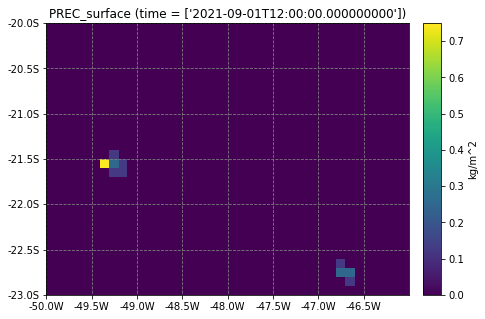

In [28]:
#plot da precipitação da superfície na região da bacia hidrográfica do tiête
dsr = ds.sel(latitude=slice(-23, -20), longitude=slice(-50, -46))
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
dsr.PREC_surface.salem.quick_map();

In [49]:
#fazendo a redução da resolução
import pandas as pd
import xarray

x = np.linspace(0, 10, 300)
t = pd.date_range("01/09/2021", periods=1)
da = xr.DataArray(
     np.sin(x) * np.cos(np.linspace(0, 1, 1)[:, np.newaxis]),
     dims=["time", "x"],
     coords={"time": t, "x": x},
    )
da

<xarray.DataArray (time: 1, x: 300)>
array([[ 0.        ,  0.03343858,  0.06683976,  0.10016619,  0.13338058,
         0.1664458 ,  0.19932485,  0.23198097,  0.26437762,  0.29647859,
         0.32824796,  0.3596502 ,  0.39065018,  0.42121325,  0.4513052 ,
         0.4808924 ,  0.50994174,  0.53842073,  0.56629753,  0.59354095,
         0.62012052,  0.64600652,  0.67116999,  0.69558279,  0.71921762,
         0.74204803,  0.76404851,  0.78519443,  0.80546214,  0.82482899,
         0.84327331,  0.86077446,  0.87731288,  0.89287007,  0.90742863,
         0.92097227,  0.93348585,  0.94495538,  0.95536801,  0.96471211,
         0.97297723,  0.98015412,  0.98623476,  0.99121234,  0.99508129,
         0.9978373 ,  0.99947728,  0.99999938,  0.99940304,  0.99768891,
         0.99485892,  0.99091623,  0.98586524,  0.97971161,  0.97246222,
         0.96412518,  0.95470981,  0.94422665,  0.93268741,  0.92010501,
         0.90649351,  0.89186815,  0.87624528,  0.85964236,  0.84207798,
         0.82357178,  0.80414445,  0.78381772,  0.76261434,  0.740558  ,
         0.71767339,  0.69398609,  0.66952261,  0.64431029,  0.61837735,
         0.59175278,  0.56446636,  0.53654862,  0.50803077,  0.47894471,
         0.44932298,  0.4191987 ,  0.38860557,  0.35757781,  0.3261501 ,
         0.29435762,  0.26223591,  0.2298209 ,  0.19714885,  0.1642563 ,
         0.13118004,  0.09795705,  0.06462451,  0.03121969, -0.00222005,
        -0.03565731, -0.06905469, -0.10237483, -0.13558047, -0.16863447,
...
         0.39473361,  0.42523609,  0.45526296,  0.48478064,  0.51375612,
         0.54215699,  0.56995148,  0.5971085 ,  0.62359769,  0.64938942,
         0.67445484,  0.69876591,  0.72229544,  0.74501712,  0.76690554,
         0.78793621,  0.80808561,  0.82733121,  0.84565148,  0.86302593,
         0.87943512,  0.89486071,  0.90928544,  0.92269318,  0.93506893,
         0.94639886,  0.95667028,  0.96587171,  0.97399286,  0.98102465,
         0.98695921,  0.9917899 ,  0.99551133,  0.99811932,  0.99961097,
         0.9999846 ,  0.99923979,  0.99737739,  0.99439946,  0.99030935,
         0.98511163,  0.9788121 ,  0.97141782,  0.96293706,  0.9533793 ,
         0.94275523,  0.93107674,  0.91835688,  0.90460988,  0.88985112,
         0.87409711,  0.85736546,  0.83967489,  0.82104518,  0.80149718,
         0.78105274,  0.75973473,  0.73756699,  0.71457432,  0.69078243,
         0.66621794,  0.64090831,  0.61488186,  0.5881677 ,  0.56079569,
         0.53279647,  0.50420133,  0.47504228,  0.44535191,  0.41516343,
         0.38451062,  0.35342775,  0.32194959,  0.29011134,  0.25794862,
         0.22549739,  0.19279396,  0.15987489,  0.12677702,  0.09353735,
         0.06019306,  0.02678145, -0.00666012, -0.04009423, -0.0734835 ,
        -0.10679059, -0.13997823, -0.17300932, -0.2058469 , -0.23845425,
        -0.27079491, -0.30283269, -0.33453177, -0.36585669, -0.39677242,
        -0.42724437, -0.45723848, -0.48672119, -0.51565952, -0.54402111]])
Coordinates:
  * time     (time) datetime64[ns] 2021-01-09
  * x        (x) float64 0.0 0.03344 0.06689 0.1003 ... 9.9 9.933 9.967 10.0

In [50]:
da.to_netcdf('/content/reducao.nc')

In [53]:
#salvando um novo arquivo com as delimitações da localização da bacia
dsr.to_netcdf('/content/subset_SP.nc')

In [32]:
#lendo o arquivo com as delimitações da bacia do tiête
dst = salem.open_xr_dataset('subset_SP.nc')
dst

<xarray.Dataset>
Dimensions:        (latitude: 30, longitude: 40, time: 1)
Coordinates:
  * latitude       (latitude) float64 -22.95 -22.85 -22.75 ... -20.15 -20.05
  * longitude      (longitude) float64 -49.95 -49.85 -49.75 ... -46.15 -46.05
  * time           (time) datetime64[ns] 2021-09-01T12:00:00
Data variables:
    PREC_surface   (time, latitude, longitude) float32 ...
    PRMSL_surface  (time, latitude, longitude) float32 ...
Attributes:
    Conventions:          COARDS
    History:              created by wgrib2
    GRIB2_grid_template:  0
    pyproj_srs:           +proj=longlat +datum=WGS84 +no_defs

In [33]:
#transformando o dado em um dataframe
df_dst = dst.to_dataframe()
df_dst

PREC_surface  PRMSL_surface
latitude longitude time                                            
-22.95   -49.95    2021-09-01 12:00:00           0.0            1.0
         -49.85    2021-09-01 12:00:00           0.0            NaN
         -49.75    2021-09-01 12:00:00           0.0            NaN
         -49.65    2021-09-01 12:00:00           0.0            NaN
         -49.55    2021-09-01 12:00:00           0.0            NaN
...                                              ...            ...
-20.05   -46.45    2021-09-01 12:00:00           0.0            NaN
         -46.35    2021-09-01 12:00:00           0.0            NaN
         -46.25    2021-09-01 12:00:00           0.0            NaN
         -46.15    2021-09-01 12:00:00           0.0            NaN
         -46.05    2021-09-01 12:00:00           0.0            NaN

[1200 rows x 2 columns]

In [34]:
#salvando em uma tabela
listagem = df_dst.to_csv('/content/listagem.csv')